## VN30F1M 1m timeframe - volume profile

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import requests

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

In [24]:
USER_AGENTS = [
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 12_3_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36"
]

HEADERS = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
VNDIRECT_DATA_HISTORY_URL = 'https://dchart-api.vndirect.com.vn/dchart/history'
URL = VNDIRECT_DATA_HISTORY_URL

In [25]:
def getStockHistoryData(ticker, timestamp_from=0, timestamp_to=0):
    if timestamp_from == 0:
        three_months = date.today() + relativedelta(months=-3)
        timestamp_from = datetime.strptime(three_months.strftime("%m/%d/%Y") + ', 00:00:0', "%m/%d/%Y, %H:%M:%S")\
            .timestamp()
    if timestamp_to == 0:
        timestamp_to = datetime.strptime(date.today().strftime("%m/%d/%Y") + ', 23:59:00', "%m/%d/%Y, %H:%M:%S")\
            .timestamp()

    params = {
        "resolution": "1",
        "symbol": str(ticker),
        "from": int(timestamp_from),
        "to": int(timestamp_to)
    }

    x = requests.get(URL, params=params, headers=HEADERS)
    response = x.json()

    import numpy as np
    import pandas as pd

    timestamp = np.array(response['t']).astype(int)
    close = np.array(response['c']).astype(float)
    open = np.array(response['o']).astype(float)
    high = np.array(response['h']).astype(float)
    low = np.array(response['l']).astype(float)
    volume = np.array(response['v']).astype(int)

    dataset = pd.DataFrame({'Time': timestamp, 'Open': list(open), 'High': list(high), 'Low': list(low),
                            'Close': list(close), 'Volume': list(volume)},
                           columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    return dataset

In [26]:
def prepareData(htd):
    if 'Time' in htd.columns:
        from datetime import datetime

        htd['DateStr'] = htd.apply(
            lambda x: datetime.fromtimestamp(x['Time']).strftime("%Y-%m-%d %H:%M:%S"), axis=1)

    htd['Date'] = pd.to_datetime(htd['DateStr'])
    # htd['Date'] = htd['Date'] + pd.DateOffset(hours=7)
    ticker_data = htd.set_index('Date')
    ticker_data.drop(columns=['Time', 'DateStr'], inplace=True)
    return ticker_data

In [27]:
ticker = "VN30F1M"
htd = getStockHistoryData(ticker, 0, 0)
data = prepareData(htd)
data = data.dropna()
data

,Open,High,Low,Close,Volume
Date,,,,,
2024-06-06 09:00:00,1295.5,1298.5,1295.5,1298.3,3677
2024-06-06 09:01:00,1298.3,1299.2,1298.3,1298.9,1677
2024-06-06 09:02:00,1298.9,1299.7,1298.7,1299.7,1154
2024-06-06 09:03:00,1299.6,1299.7,1298.7,1298.9,1098
2024-06-06 09:04:00,1298.9,1299.3,1298.6,1299.1,723
...,...,...,...,...,...
2024-09-06 13:29:00,1309.2,1309.5,1309.1,1309.2,551
2024-09-06 13:30:00,1309.3,1309.6,1309.1,1309.5,684
2024-09-06 13:31:00,1309.5,1309.5,1309.2,1309.4,386


In [28]:
# Tinh tu ngay dao han phai sinh thang truoc
data = data[data.index > '2024-08-16 23:00:00']
data

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-19 09:00:00,1289.0,1289.9,1288.3,1289.6,2594
2024-08-19 09:01:00,1289.6,1290.4,1289.6,1289.7,1117
2024-08-19 09:02:00,1289.5,1290.0,1289.2,1289.3,737
2024-08-19 09:03:00,1289.2,1289.3,1289.0,1289.3,697
2024-08-19 09:04:00,1289.1,1289.7,1289.1,1289.3,415
...,...,...,...,...,...
2024-09-06 13:29:00,1309.2,1309.5,1309.1,1309.2,551
2024-09-06 13:30:00,1309.3,1309.6,1309.1,1309.5,684
2024-09-06 13:31:00,1309.5,1309.5,1309.2,1309.4,386


In [29]:
data['o1'] = data.apply(lambda r: 0 if r['Close'] == r['Open'] else (r['Volume'] if r['Close'] > r['Open'] else -r['Volume']), axis=1)

In [30]:
data['o2'] = data['o1'].shift(1)

In [31]:
data.dropna(inplace=True)

In [32]:
data['obv'] = data.apply(lambda r: r['o1'] + r['o2'], axis=1)

In [33]:
# data.drop(columns=['o1', 'o2'], inplace=True)

In [34]:
data

,Open,High,Low,Close,Volume,o1,o2,obv
Date,,,,,,,,
2024-08-19 09:01:00,1289.6,1290.4,1289.6,1289.7,1117,1117.0,2594.0,3711.0
2024-08-19 09:02:00,1289.5,1290.0,1289.2,1289.3,737,-737.0,1117.0,380.0
2024-08-19 09:03:00,1289.2,1289.3,1289.0,1289.3,697,697.0,-737.0,-40.0
2024-08-19 09:04:00,1289.1,1289.7,1289.1,1289.3,415,415.0,697.0,1112.0
2024-08-19 09:05:00,1289.3,1290.2,1289.3,1290.0,622,622.0,415.0,1037.0
...,...,...,...,...,...,...,...,...
2024-09-06 13:29:00,1309.2,1309.5,1309.1,1309.2,551,0.0,-226.0,-226.0
2024-09-06 13:30:00,1309.3,1309.6,1309.1,1309.5,684,684.0,0.0,684.0
2024-09-06 13:31:00,1309.5,1309.5,1309.2,1309.4,386,-386.0,684.0,298.0


<Axes: xlabel='Date'>

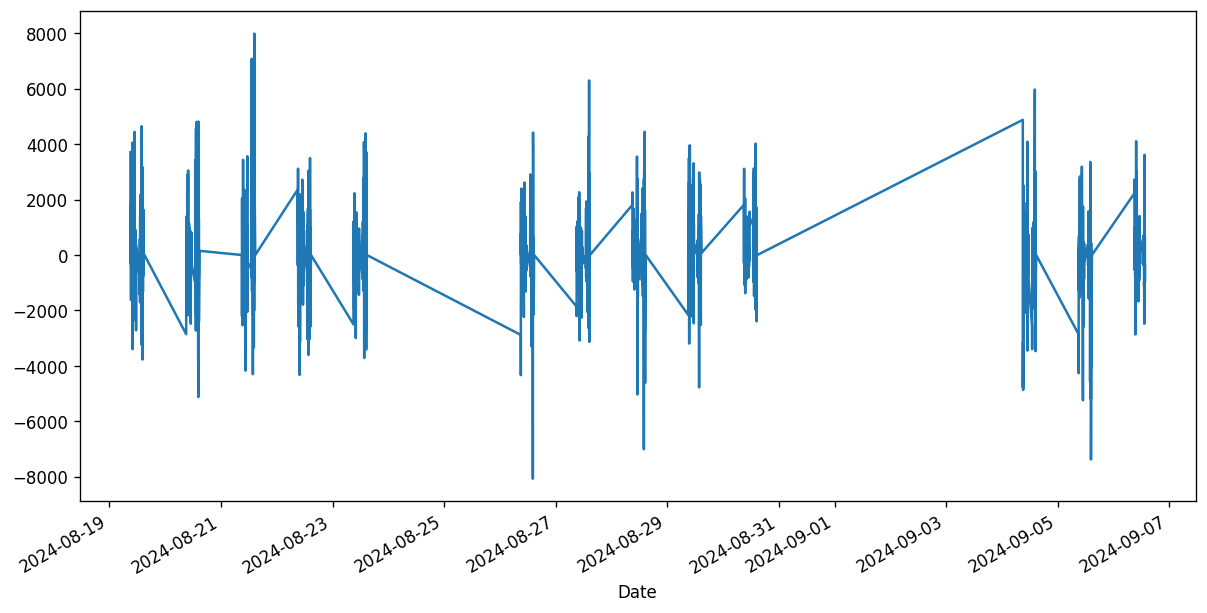

In [35]:
data.obv.plot.line() 